In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


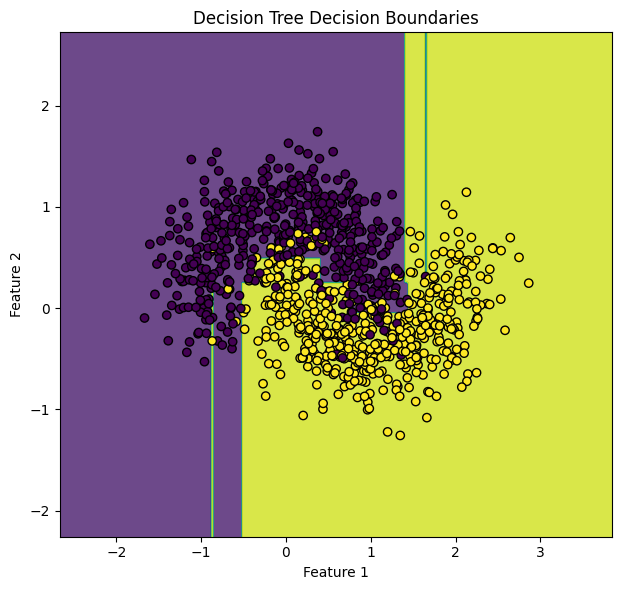

In [2]:
# Generate the moon dataset
X_moon, y_moon = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size=0.2, random_state=42)

# Create a pipeline for Decision Tree classifier
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=5))
])


# Define the meshgrid for plotting
h = 0.02  
x_min, x_max = X_moon[:, 0].min() - 1, X_moon[:, 0].max() + 1
y_min, y_max = X_moon[:, 1].min() - 1, X_moon[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Fit the classifiers
dt_pipeline.fit(X_moon, y_moon)

# Make predictions on the meshgrid
dt_predictions_mesh = dt_pipeline.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape predictions for plotting
dt_predictions_mesh = dt_predictions_mesh.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 6))

# Decision Tree
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, dt_predictions_mesh, alpha=0.8)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, edgecolors='k')
plt.title("Decision Tree Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


plt.tight_layout()
plt.show()


## evaluating decision tree for differnt max_depth

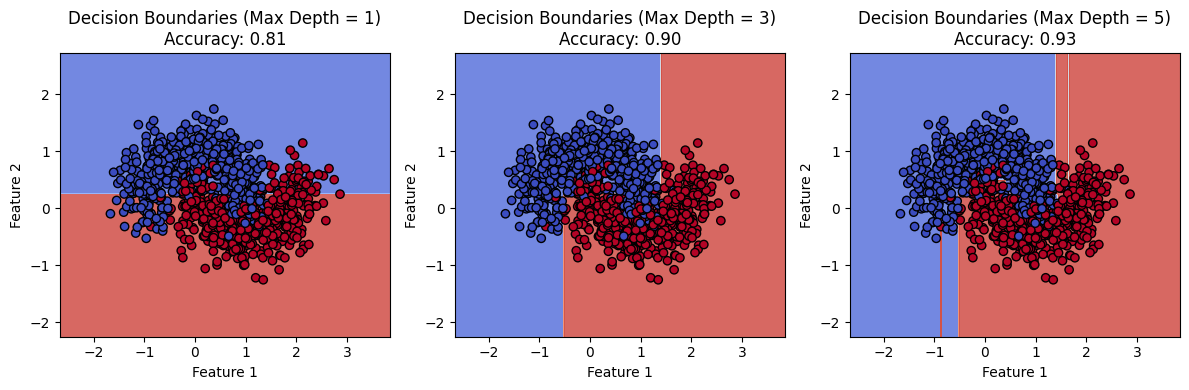

In [10]:
# Generate the moon dataset
X_moon, y_moon = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size=0.2, random_state=42)

# Define different max depths to compare
max_depths = [1, 3, 5]

# Create subplots
fig, axs = plt.subplots(1, len(max_depths), figsize=(12, 4))
# Define the colormap
cmap = 'coolwarm'

for i, max_depth in enumerate(max_depths):
    # Create a pipeline with preprocessing and modeling steps
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(max_depth=max_depth))
    ])
    
    # Fit the pipeline on the moon dataset
    pipeline.fit(X_moon, y_moon)
    
    # Create a meshgrid for plotting
    h = 0.02
    x_min, x_max = X_moon[:, 0].min() - 1, X_moon[:, 0].max() + 1
    y_min, y_max = X_moon[:, 1].min() - 1, X_moon[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the meshgrid
    predictions_mesh = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Reshape predictions for plotting
    predictions_mesh = predictions_mesh.reshape(xx.shape)
    
    # Calculate accuracy on the training data
    accuracy = accuracy_score(y_moon, pipeline.predict(X_moon))
    
    # Plot the decision boundaries
    axs[i].contourf(xx, yy, predictions_mesh, cmap=cmap, alpha=0.8)
    axs[i].scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=cmap, edgecolors='k')
    axs[i].set_title(f"Decision Boundaries (Max Depth = {max_depth})\nAccuracy: {accuracy:.2f}")
    axs[i].set_xlabel("Feature 1")
    axs[i].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

### Load data

#### About Dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [2]:
drug_data = pd.read_csv("../Data/drug200.csv")
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Preprocess the dataset

In [3]:
# cheke a uique value in type columns
unique_value = drug_data['Drug'].unique()
unique_value

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
drug_counts=drug_data['Drug'].value_counts()
drug_counts

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

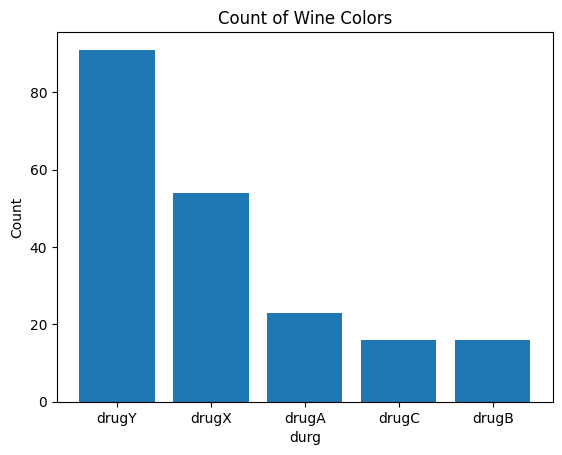

In [5]:
# Create a bar plot
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel('durg')
plt.ylabel('Count')
plt.title('Count of Wine Colors')
plt.show()

In [6]:
#check missing values
zero_value = drug_data.isnull().sum().sum()
zero_value

0

In [7]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### handling catagorical data

In [174]:
# Select the categorical columns to be encoded
categorical_columns = ['Sex',	'BP',	'Cholesterol']

# Apply one-hot encoding to the selected columns
dataset_encoded = pd.get_dummies(drug_data, columns=categorical_columns)


In [9]:
#check missing values
null_value = dataset_encoded.isnull().sum().sum()
null_value

0

In [175]:
# Split the dataset into features and target variable 
features  = dataset_encoded.drop('Drug', axis=1)
target = dataset_encoded['Drug']


# scaling data

In [12]:
sc = StandardScaler()
scaled_features = sc.fit(features).transform(features)

# Convert the standardized data back to a DataFrame 
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

### spliting data

In [14]:
#difine x  and y
X_drug_data = scaled_features 
y_drug_data = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_drug_data, y_drug_data, test_size=0.2, random_state=42)

## model decision tree with different max_depth

In [15]:
# Create a list of max depth values to try
max_depth_values = [3, 5, 7,8, 9]

for max_depth in max_depth_values:
    # Create a decision tree classifier with the current max depth
    dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    
    # Train the decision tree classifier
    dt_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = dt_clf.predict(X_test)
    
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    prec_macro = precision_score(y_test, y_pred, average='macro')
    rec_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"Max Depth: {max_depth}")
    print("Accuracy: {:.3f}".format(accuracy))
    print("Precision (macro-averaged): {:.3f}".format(prec_macro))
    print("Recall (macro-averaged): {:.3f}".format(rec_macro))
    print("F1-score (macro-averaged): {:.3f}".format(f1_macro))
    print()

Max Depth: 3
Accuracy: 0.875
Precision (macro-averaged): 0.738
Recall (macro-averaged): 0.800
F1-score (macro-averaged): 0.763

Max Depth: 5
Accuracy: 1.000
Precision (macro-averaged): 1.000
Recall (macro-averaged): 1.000
F1-score (macro-averaged): 1.000

Max Depth: 7
Accuracy: 1.000
Precision (macro-averaged): 1.000
Recall (macro-averaged): 1.000
F1-score (macro-averaged): 1.000

Max Depth: 8
Accuracy: 1.000
Precision (macro-averaged): 1.000
Recall (macro-averaged): 1.000
F1-score (macro-averaged): 1.000

Max Depth: 9
Accuracy: 1.000
Precision (macro-averaged): 1.000
Recall (macro-averaged): 1.000
F1-score (macro-averaged): 1.000



c:\Users\Hallo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Different decision tree models were trained and evaluated using various maximum depths. For a model with a maximum depth of 3, an accuracy of 87.5% was achieved. The precision, recall, and F1-score (macro-averaged) were 0.738, 0.800, and 0.763, respectively. As the maximum depth increased to 5, 7, and 8, the accuracy, precision, recall, and F1-score (macro-averaged) all reached perfect scores of 100%. 

### classification_report

The classification report visualizer provides an overview of the performance of a model by displaying precision, recall, F1 score, and support scores. Precision measures the accuracy of positive predictions, while recall quantifies the ability to correctly identify positive instances. The F1 score is a combined measure of precision and recall, representing the balance between them. It is a weighted harmonic mean and is useful for comparing different classifier models. The classification report helps assess the model's effectiveness in making correct predictions and identifying positive cases accurately.


In [17]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



the results indicate that the model achieved perfect precision, recall, and F1-score for each class and an overall accuracy of 100%. It performed exceptionally well on the given test set, correctly predicting the classes for all instances.

### Visualizing decision tree

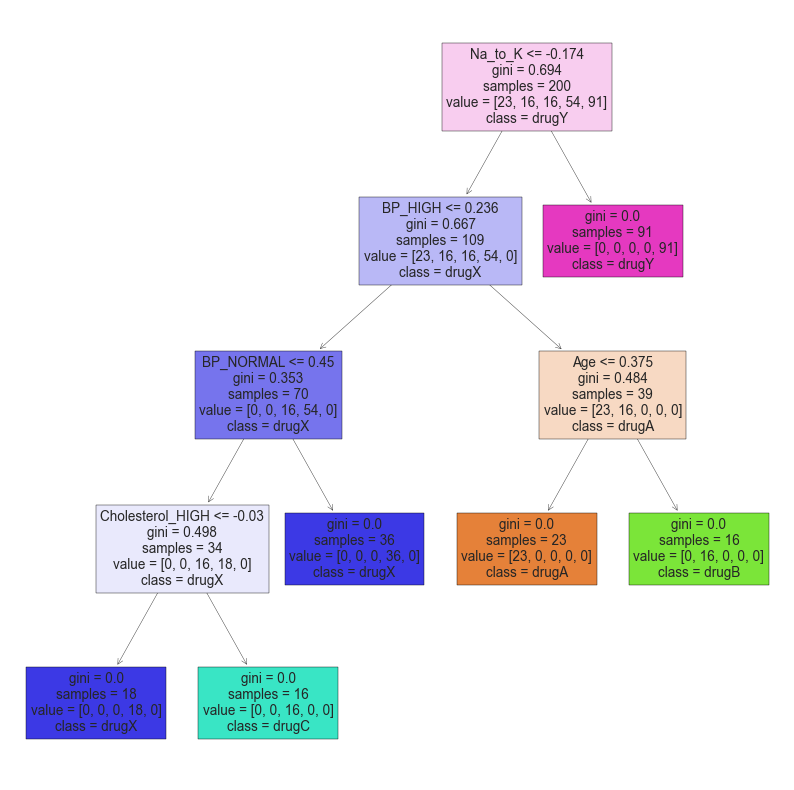

In [24]:
clf = tree.DecisionTreeClassifier()
clf.fit(scaled_data, target)
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, feature_names=scaled_data.columns, class_names=clf.classes_, filled=True)
plt.show()



One notable split in the decision tree occurred based on the "NA_to_K" feature, with a threshold of 0.174. When the "NA_to_K" value was less than or equal to 0.174, the model assigned the class label "Drug Y" to the patients within that group. The distribution of classes in this group consisted of 23 patients for "Drug A," 26 patients for "Drug B," 26 patients for "Drug C," 54 patients for "Drug X," and 91 patients for "Drug Y."

This split indicated that patients with "NA_to_K" values below or equal to 0.174 exhibited a characteristic or pattern associated with a higher likelihood of responding well to "Drug Y." 

The second node was divided based on the "BP_HIGH" feature with a threshold of 0.236. The Gini index was calculated as 0.667, indicating moderate impurity in this node. The majority class was Drug X, suggesting that patients with "BP_HIGH" values below or equal to 0.236 were more likely to receive Drug X as their treatment.

## confusion_matrix

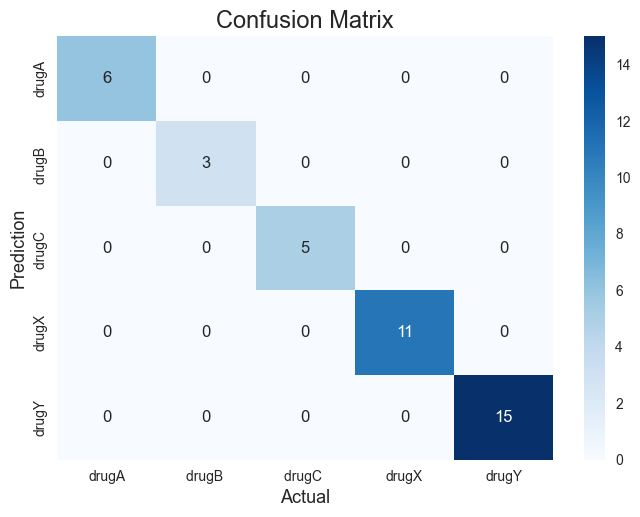

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
#Train the SVM model using the training set
clf.fit(X_train, y_train)
   
# Predict on the test set
y_pred = clf.predict(X_test)
   
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels (if applicable)
classes = ['drugA', 'drugB ', 'drugC ', 'drugX', 'drugY']  # Replace with your actual class labels

# Plot the confusion matrix
sns.heatmap(cm, annot=True, yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()






### cross-validation

In [32]:
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(clf, X_drug_data, y_drug_data, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Train the decision tree model on the entire dataset
clf.fit(X_drug_data, y_drug_data)

Cross-Validation Scores: [1.    1.    1.    0.925 1.   ]
Mean CV Score: 0.985


DecisionTreeClassifier()

cross-validation scores you obtained indicates the decision tree classifier trained and evaluated using cross-validation achieved high accuracy, with scores of 1.0 on most of the folds and an average accuracy of 98.5% across all the folds. This suggests that the model is performing well on the given dataset.

### Pruning decision trees
Pruning is one of the mainly used technique to avoid/overcome overfitting
commonly used pruning types
1. Prepruning
2. Postpruning

Pre pruning is a technique used to limit the growth of decision trees before they become fully grown. By setting constraints on parameters such as max_depth, min_samples_split, min_samples_leaf, and others, we can control the growth of the tree and prevent overfitting GridSearch is one method of preprunig. https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial.

In [44]:
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'min_samples_split' : range(10, 500, 20),
    'max_depth': range(1, 20, 2),
    'criterion': ["gini", "entropy"],
    'min_samples_leaf': range(1, 50, 5)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.99375


The decision tree classifier was optimized using a parameter tuning process, resulting in the selection of the best parameters. The chosen parameters include using the 'gini' criterion for splitting, a maximum depth of 5 to control the tree's depth, a minimum number of samples per leaf set to 1, and a minimum number of samples required to split an internal node set to 10. With these optimized parameters, the decision tree classifier achieved a high accuracy of 99.375% on the evaluation data. This indicates that the model performed exceptionally well in predicting the classes for the given dataset, showcasing its effectiveness in classification tasks.

### Perform cost complexity pruning to find the optimal alpha value.

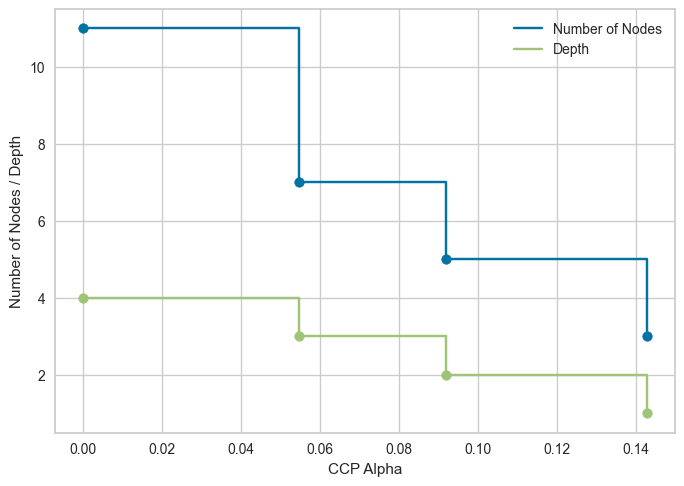

In [48]:
# Calculate the path of alphas and impurities:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Create a series of pruned decision tree classifiers
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]  
ccp_alphas = ccp_alphas[:-1] 
#Calculate node counts and depth of pruned trees
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
#Visualize the relationship between alpha, node counts, and depth

plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas, node_counts, label='Number of Nodes', drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label='Depth', drawstyle="steps-post")
plt.xlabel('CCP Alpha')
plt.ylabel('Number of Nodes / Depth')
plt.legend()
plt.show()

based on the above plot the data seems not overfited so no need to eliminate the last nodes 

### calculate and plot accuracy vs. alpha

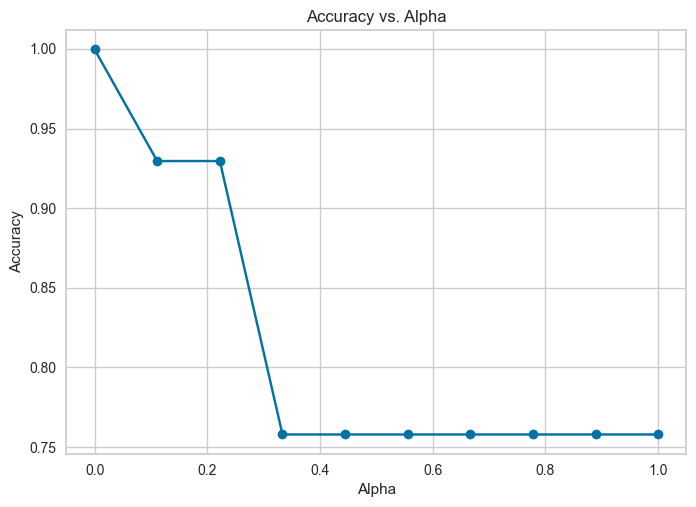

In [148]:

# # Define a range of alpha values to test
# alphas = np.linspace(0, 1, 10)

# Initialize lists to store alpha values and corresponding accuracies
alpha_values = []
accuracies = []

# Iterate over alpha values
for alpha in alphas:
    # Create and train the decision tree classifier with current alpha
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    
    # Make predictions on the validation or test set
    y_pred = clf.predict(X_train)  # Replace X_val with your validation or test set
    
    # Calculate accuracy and store alpha value and accuracy
    accuracy = accuracy_score(y_train, y_pred)  # Replace y_val with your validation or test set labels
    alpha_values.append(alpha)
    accuracies.append(accuracy)

# Plot accuracy vs. alpha
plt.plot(alpha_values, accuracies, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha')
plt.show()

## load wine data

In [110]:
wine_data= pd.read_csv('../Data/Wine_Quality_Data.csv')
wine_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [111]:
# cheke a uique value in type columns
unique_value = wine_data['color'].unique()
unique_value

array(['red', 'white'], dtype=object)

In [112]:
color_counts =wine_data['color'].value_counts()
color_counts

white    4898
red      1599
Name: color, dtype: int64

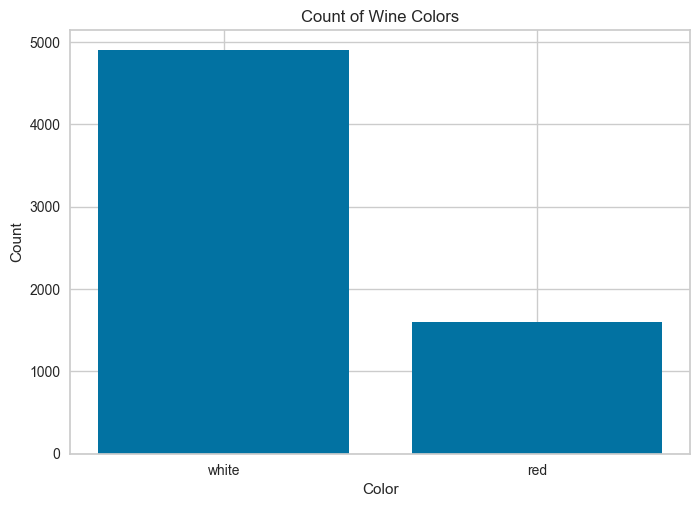

In [113]:
# Create a bar plot
plt.bar(color_counts.index, color_counts.values)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of Wine Colors')
plt.show()

In [114]:
#check missing values
null_value = wine_data.isnull().sum().sum()
null_value

0

In [115]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


according to this infromation we dont have to drop any columns

### Extract the features

In [116]:
# Split the dataset into features and target variable 
wine_features  = wine_data.drop('color', axis=1)
target = wine_data['color']

### check for skewness

In [117]:
skewness =wine_features .skew()
highly_skewed_count = 0
approximately_symmetric_count = 0

# Count the number of columns in each skewness category
for skewness_value in skewness:
    if skewness_value < 0.75:
        highly_skewed_count += 1
    else:
        approximately_symmetric_count += 1

print(f"Number of highly skewed columns: {highly_skewed_count}")
print(f"Number of approximately symmetric columns: {approximately_symmetric_count}")

Number of highly skewed columns: 6
Number of approximately symmetric columns: 6


### log transform the data

In [124]:
# creat empiy list of columns
skewed_columns = []
for column in wine_features.columns:
    skewness = skew(wine_features[column])
    if abs(skewness) > 0.75:  
        skewed_columns.append(column)
# Logarithmic transformation of skewed columns
wine_features[skewed_columns] = wine_features[skewed_columns].apply(lambda x: np.log1p(x))

## check the scale of featurs

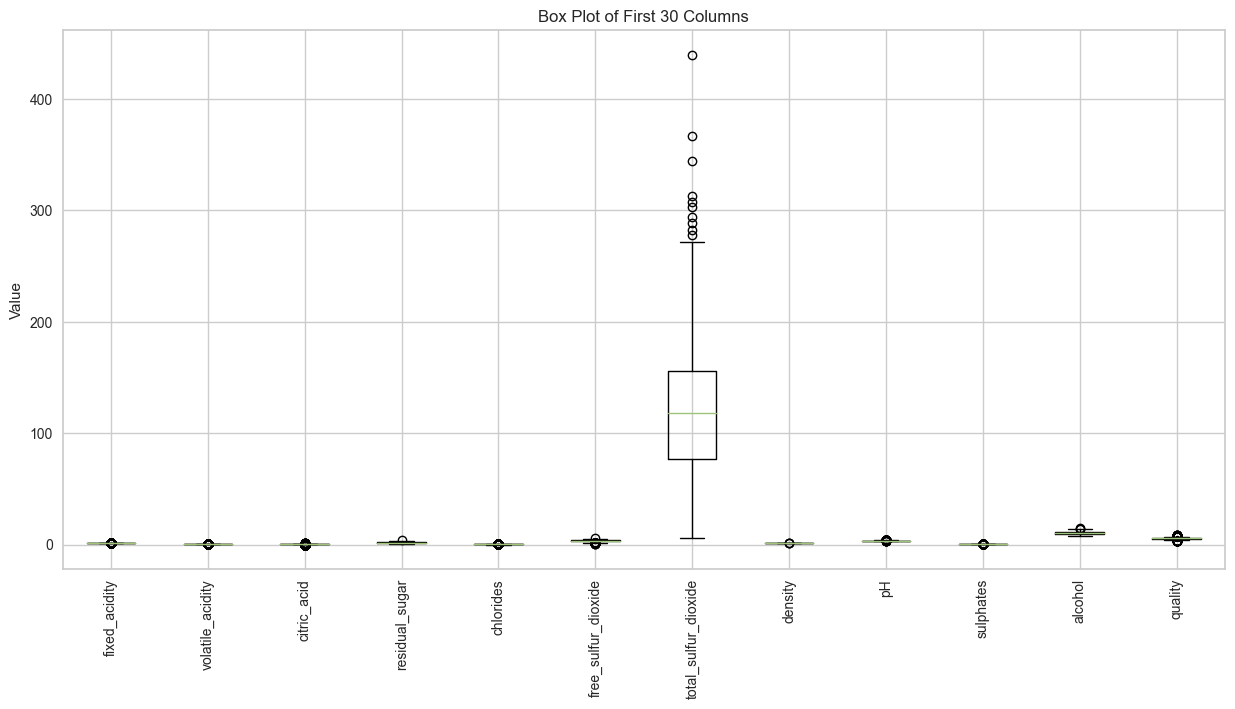

In [125]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(15, 7))

# Select the first 30 columns from your dataset
selected_columns = wine_features.columns

# Create a box plot for the selected columns
plt.boxplot(wine_features[selected_columns])

# Set the x-axis tick labels
plt.xticks(range(1, len(selected_columns) + 1), selected_columns, rotation='vertical')

# Set the y-axis label
plt.ylabel('Value')

# Set the plot title
plt.title('Box Plot of First 30 Columns')

# Display the plot
plt.show()

the features seems not in the same scale

In [129]:
sc = StandardScaler()
scaled_features_wine = sc.fit(wine_features).transform(wine_features)

# Convert the standardized data back to a DataFrame 
scaled_data_wine = pd.DataFrame(scaled_features_wine, columns=wine_features.columns)

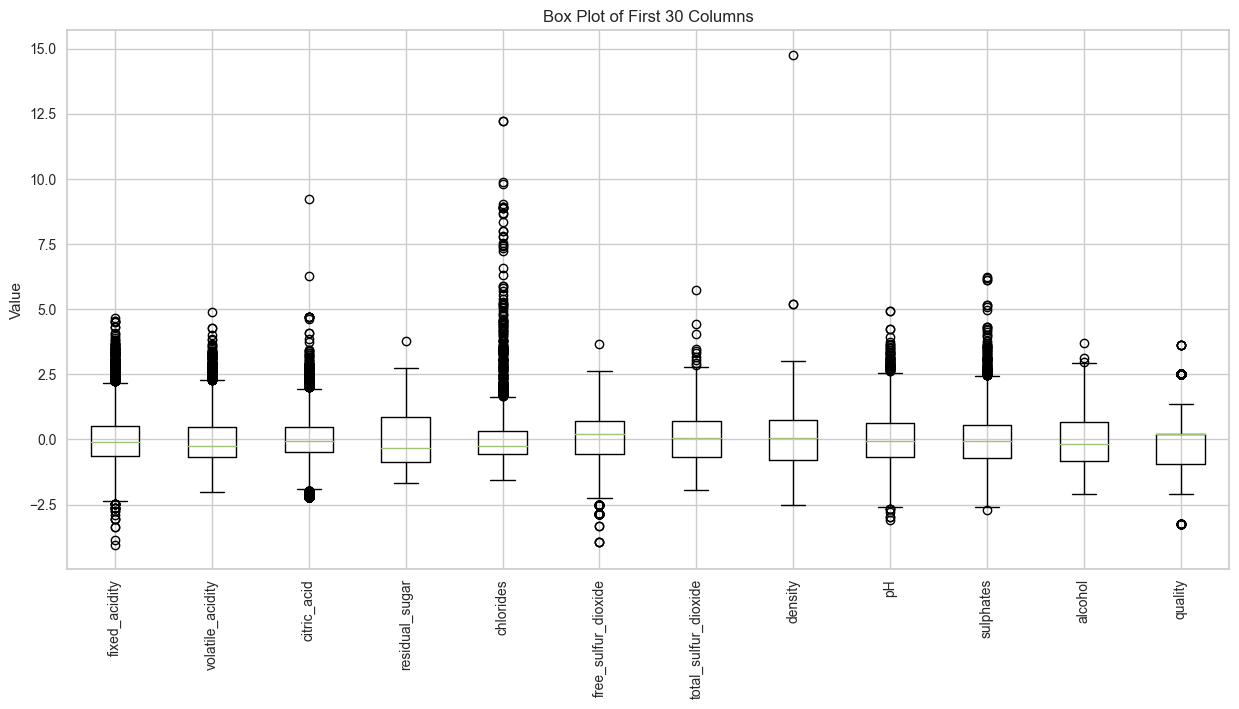

In [130]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(15, 7))

# Select the first 30 columns from your dataset
selected_columns = scaled_data_wine.columns

# Create a box plot for the selected columns
plt.boxplot(scaled_data_wine[selected_columns])

# Set the x-axis tick labels
plt.xticks(range(1, len(selected_columns) + 1), selected_columns, rotation='vertical')

# Set the y-axis label
plt.ylabel('Value')

# Set the plot title
plt.title('Box Plot of First 30 Columns')

# Display the plot
plt.show()

### Splitting Data

In [131]:
#difine x  and y
X_wine_data = scaled_data_wine
y_wine_data = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_wine_data, y_wine_data, test_size=0.2, random_state=42)

In [132]:
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the decision tree classifier
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average='macro')
rec_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Accuracy:{:.3f}".format(accuracy))
print("Precision (macro-averaged):{:.3f}".format(prec_macro))
print("Recall (macro-averaged):{:.3f}".format( rec_macro))
print("F1-score (macro-averaged):{:.3f}".format( f1_macro))

Accuracy:0.982
Precision (macro-averaged):0.981
Recall (macro-averaged):0.973
F1-score (macro-averaged):0.977


### Model Evaluation

In [133]:
# Create a list of max depth values to try
max_depth_values = [3, 5, 7,8, 9]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_wine_data, y_wine_data, test_size=0.2, random_state=42)

for max_depth in max_depth_values:
    # Create a decision tree classifier with the current max depth
    dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    
    # Train the decision tree classifier
    dt_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = dt_clf.predict(X_test)
    
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    prec_macro = precision_score(y_test, y_pred, average='macro')
    rec_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"Max Depth: {max_depth}")
    print("Accuracy: {:.3f}".format(accuracy))
    print("Precision (macro-averaged): {:.3f}".format(prec_macro))
    print("Recall (macro-averaged): {:.3f}".format(rec_macro))
    print("F1-score (macro-averaged): {:.3f}".format(f1_macro))
    print()

Max Depth: 3
Accuracy: 0.962
Precision (macro-averaged): 0.957
Recall (macro-averaged): 0.944
F1-score (macro-averaged): 0.951

Max Depth: 5
Accuracy: 0.980
Precision (macro-averaged): 0.979
Recall (macro-averaged): 0.969
F1-score (macro-averaged): 0.974

Max Depth: 7
Accuracy: 0.980
Precision (macro-averaged): 0.973
Recall (macro-averaged): 0.975
F1-score (macro-averaged): 0.974

Max Depth: 8
Accuracy: 0.981
Precision (macro-averaged): 0.978
Recall (macro-averaged): 0.972
F1-score (macro-averaged): 0.975

Max Depth: 9
Accuracy: 0.982
Precision (macro-averaged): 0.979
Recall (macro-averaged): 0.975
F1-score (macro-averaged): 0.977



## GridSearch

In [70]:
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'min_samples_split' : range(10, 500, 20),
    'max_depth': range(1, 20, 2),
    'criterion': ["gini", "entropy"],
    'min_samples_leaf': range(1, 50, 5)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.985568779151551


## Cassification_repor

In [134]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         red       0.97      0.96      0.97       341
       white       0.99      0.99      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.98      1300
weighted avg       0.98      0.98      0.98      1300



# plot decision tree for wine data

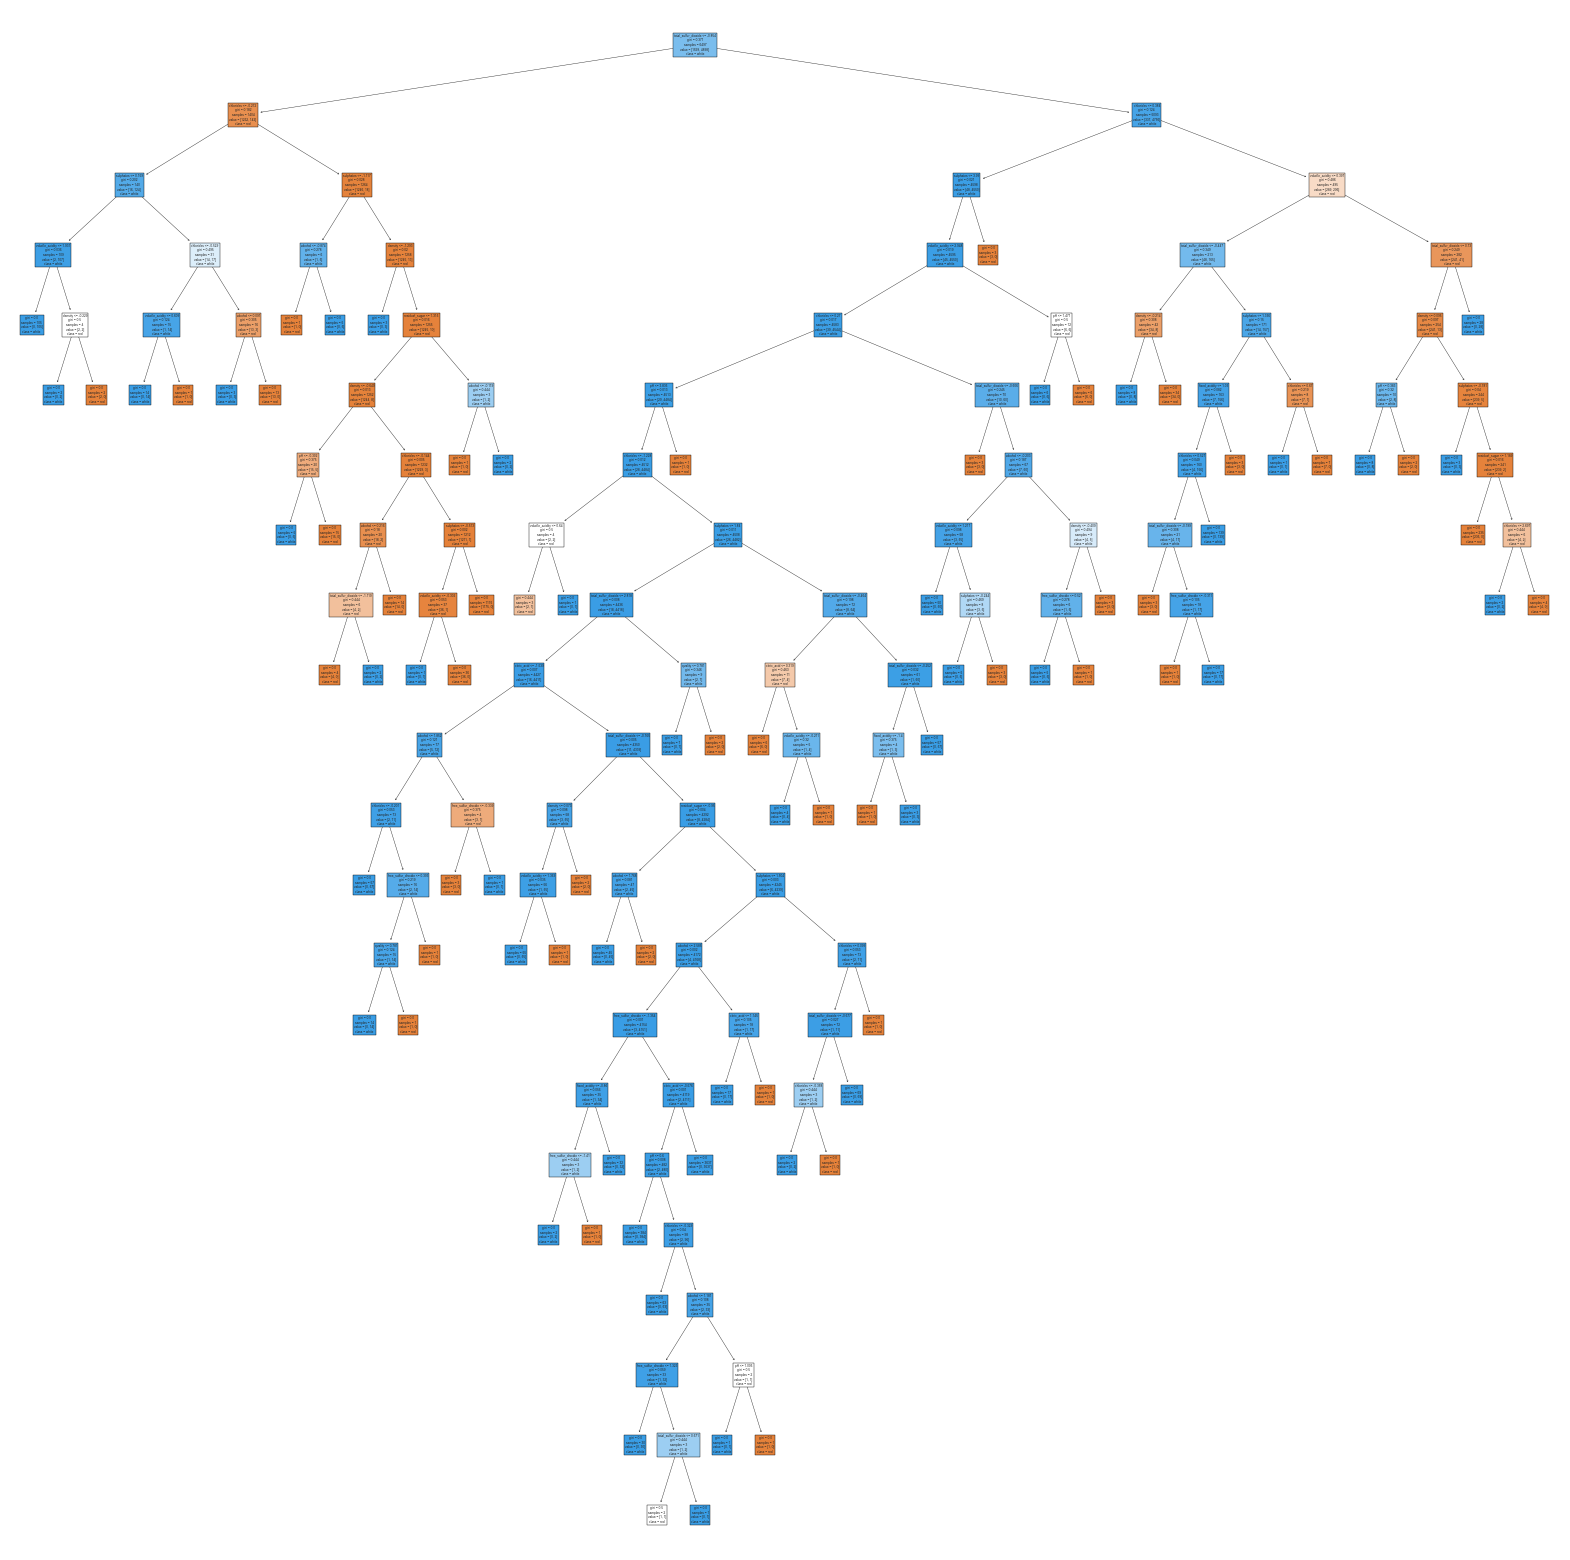

In [138]:
clf = tree.DecisionTreeClassifier()
clf.fit(scaled_data, target)
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, feature_names=scaled_data.columns, class_names=clf.classes_, filled=True)
plt.show()

## Pruning
Pruning in decision trees is a crucial technique used to prevent overfitting and enhance generalization. By restricting the growth of trees and removing unnecessary branches, pruning reduces model complexity and improves interpretability. It helps to eliminate irrelevant features, nodes, and branches, focusing on the most important patterns in the data. Pruned decision trees exhibit better generalization capabilities, performing well on unseen data and avoiding data memorization. Additionally, pruning optimizes resource utilization by creating smaller and more efficient models. Overall, pruning is vital for striking a balance between model complexity and predictive accuracy, leading to more robust and interpretable decision tree models.

### Perform cost complexity pruning to find the optimal alpha value.

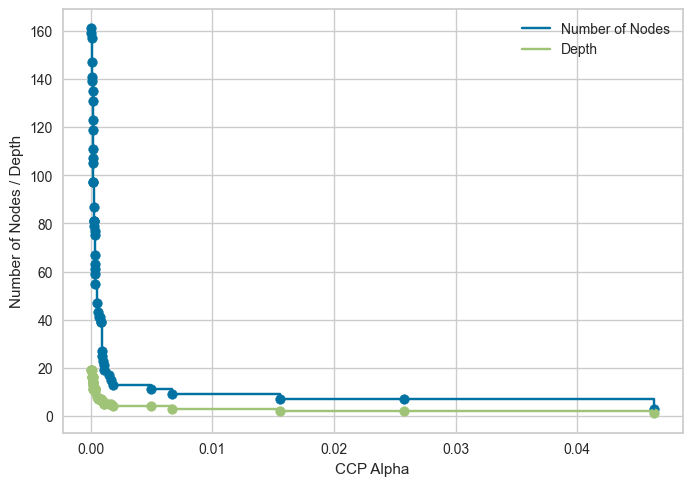

In [139]:
# Calculate the path of alphas and impurities:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Create a series of pruned decision tree classifiers
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]  
ccp_alphas = ccp_alphas[:-1] 
#Calculate node counts and depth of pruned trees
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
#Visualize the relationship between alpha, node counts, and depth

plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas, node_counts, label='Number of Nodes', drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label='Depth', drawstyle="steps-post")
plt.xlabel('CCP Alpha')
plt.ylabel('Number of Nodes / Depth')
plt.legend()
plt.show()

based on the above plot the data seems not overfited so no need to eliminate the last nodes 

### calculate and plot accuracy vs. alpha

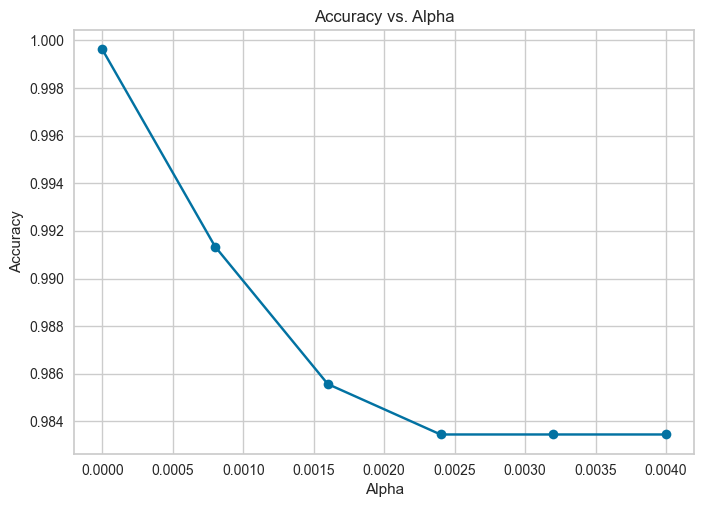

In [171]:
# Define a range of alpha values to test
alphas = np.linspace(0, 0.004, 6)

# Initialize lists to store alpha values and corresponding accuracies
alpha_values = []
accuracies = []

# Iterate over alpha values
for alpha in alphas:
    # Create and train the decision tree classifier with current alpha
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    
    # Make predictions on the validation or test set
    y_pred = clf.predict(X_train)  # Replace X_val with your validation or test set
    
    # Calculate accuracy and store alpha value and accuracy
    accuracy = accuracy_score(y_train, y_pred)  # Replace y_val with your validation or test set labels
    alpha_values.append(alpha)
    accuracies.append(accuracy)

# Plot accuracy vs. alpha
plt.plot(alpha_values, accuracies, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha')
plt.show()

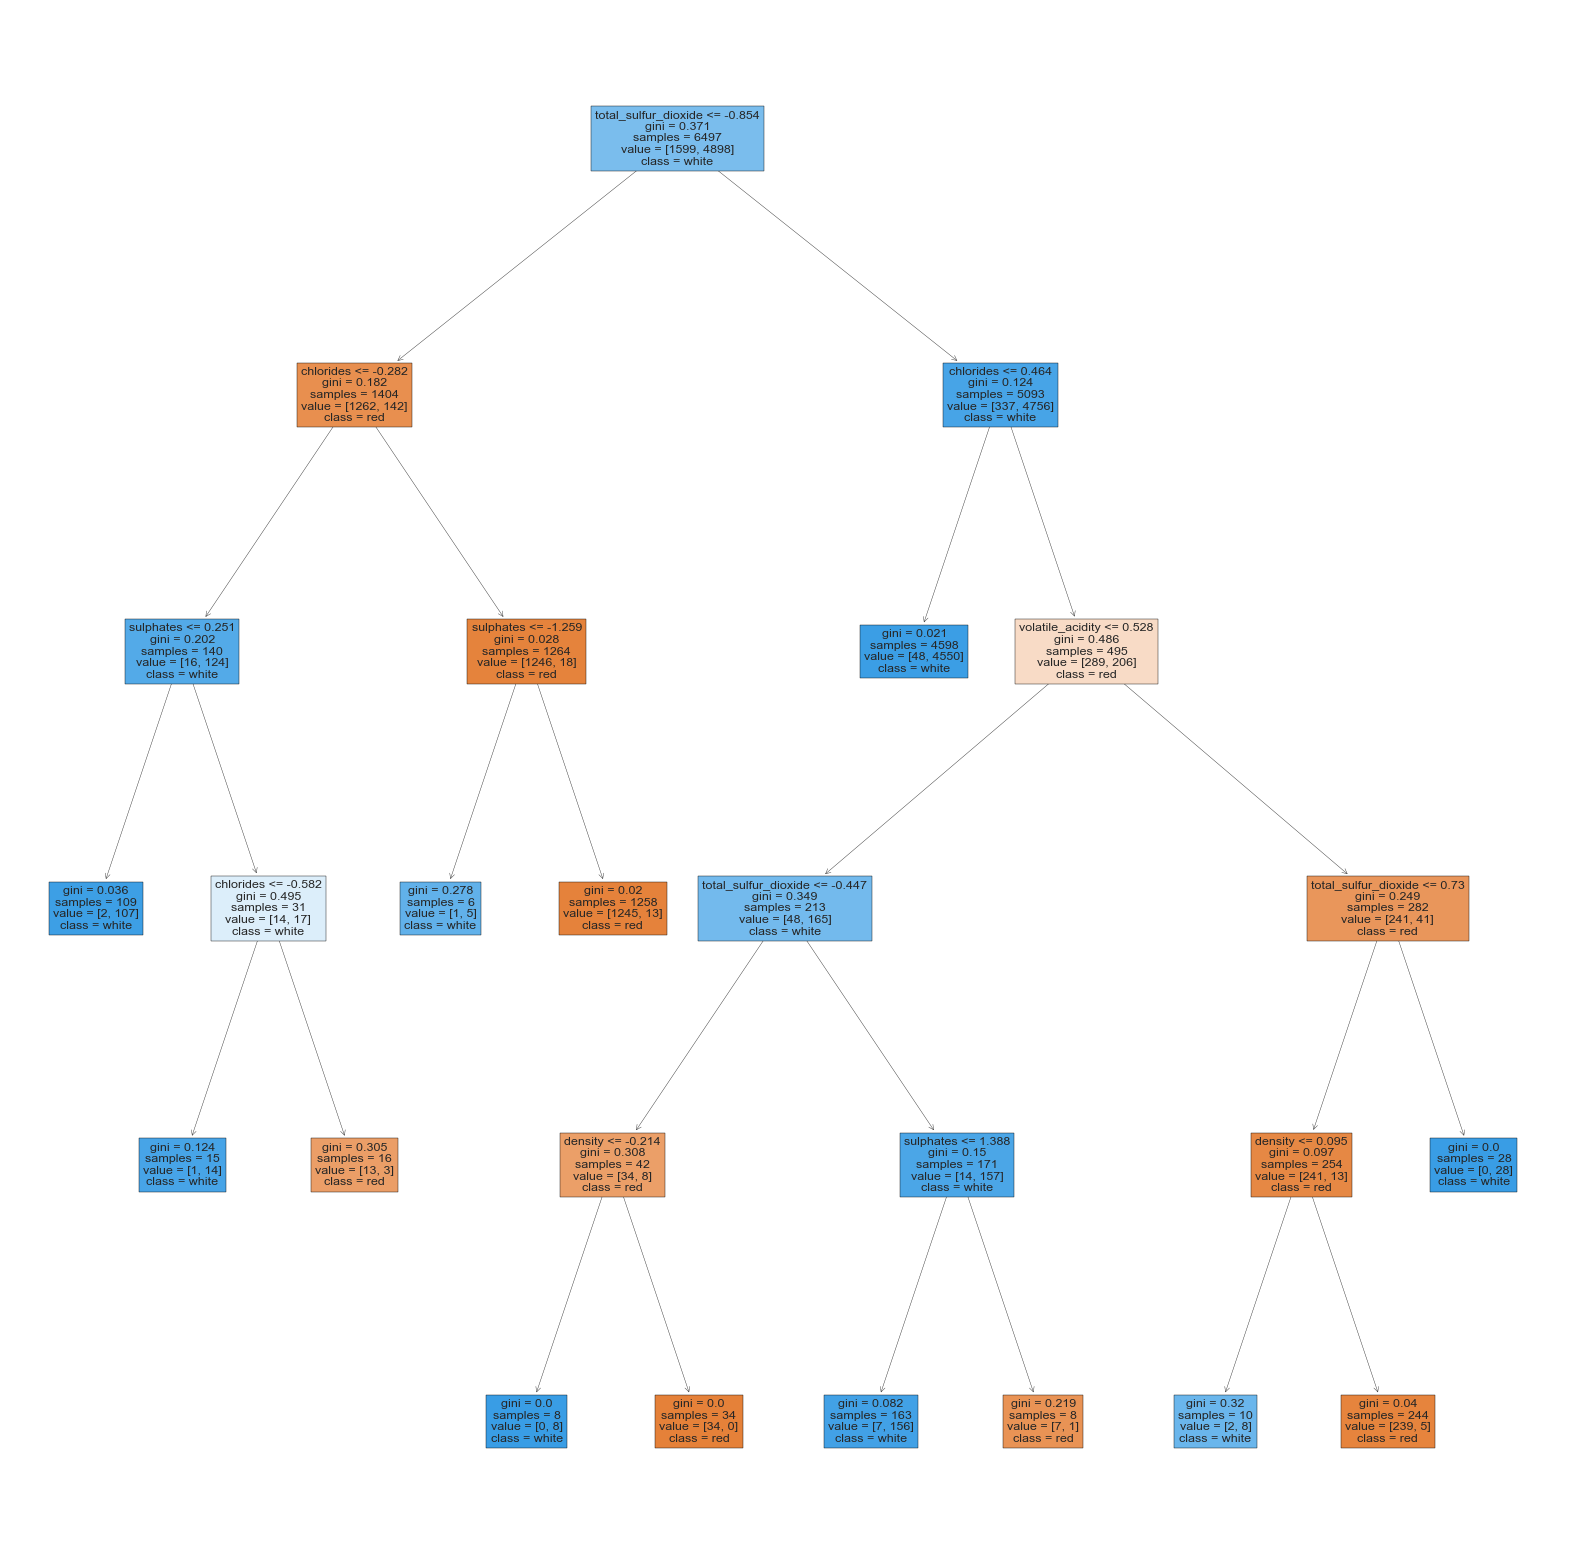

In [170]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
clf_.fit(scaled_data_wine, target)
plt.figure(figsize=(20, 20))
tree.plot_tree(clf_,feature_names=scaled_data.columns, class_names=clf.classes_, filled=True)
plt.show()

## Naive Bayes
Naive Bayes is a basic yet powerful probabilistic classification model in machine learning that is derived from Bayes' Theorem. It is particularly suitable for handling large amounts of data and has been successfully applied in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. The Naive Bayes classifier makes predictions based on the theory of probability, specifically using conditional probabilities. It assumes that the predictors are independent and contribute equally to the classification outcome, which may not hold true in real-world scenarios. However, despite this simplifying assumption, Naive Bayes often yields satisfactory results, especially in text categorization tasks where the data dimensionality is typically high. https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/

In [172]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Step 1: Data Preparation
# Assign numerical values to the categories
shivers = [1, 0, 1, 0, 0, 1, 1]
running_nose = [0, 0, 1, 1, 0, 0, 1]
headache = [0, 1, 0, 0, 2, 0, 1]
test_result = [0, 0, 1, 0, 1, 0, 1]

# Convert lists to NumPy arrays
X = np.array([shivers, running_nose, headache]).T
y = np.array(test_result)

# Step 2: Training the Naive Bayes Classifier
# Create an instance of the Naive Bayes classifier
classifier = GaussianNB()

# Fit the classifier to the training data
classifier.fit(X, y)

# Step 3: Making Predictions
# Provide new data (symptoms) to the classifier for prediction
new_data = [[0, 0, 1]]  # Example: shivers = Yes, running nose = Yes, headache = Mild

# Predict the test result based on the given symptoms
prediction = classifier.predict(new_data)

# Print the predicted test result
if prediction[0] == 0:
    print("The test result is Negative.")
else:
    print("The test result is Positive.")


The test result is Negative.


In [173]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB

# Create the DataFrame
data = {
    'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
    'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'],
    'headache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'],
    'test result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df[['shivers', 'running nose', 'headache']])

# Extract the target variable
y = df['test result']

# Train the Categorical Naive Bayes classifier
clf = CategoricalNB()
clf.fit(df_encoded, y)

# Predict the test results
predictions = clf.predict(df_encoded)

# Calculate the prediction probabilities for the instance number 5
instance_5_probabilities = clf.predict_proba(df_encoded.iloc[4:5])
negative_prob = instance_5_probabilities[0][0]
positive_prob = instance_5_probabilities[0][1]

print("Negative Probability:", negative_prob)
print("Positive Probability:", positive_prob)

Negative Probability: 0.5981410732469201
Positive Probability: 0.4018589267530796
